# Chapter4. Classification
## 02. Decision Tree Visualization

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

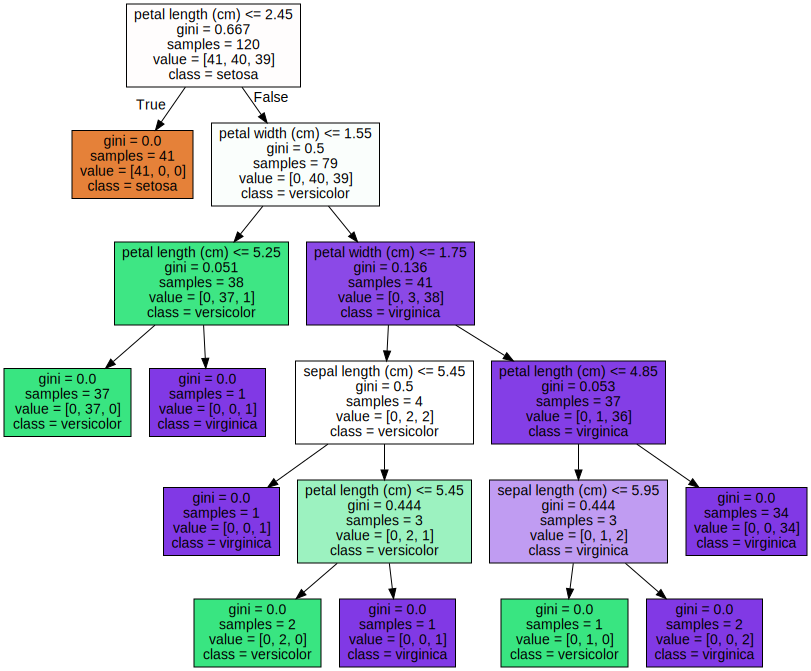

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
0
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

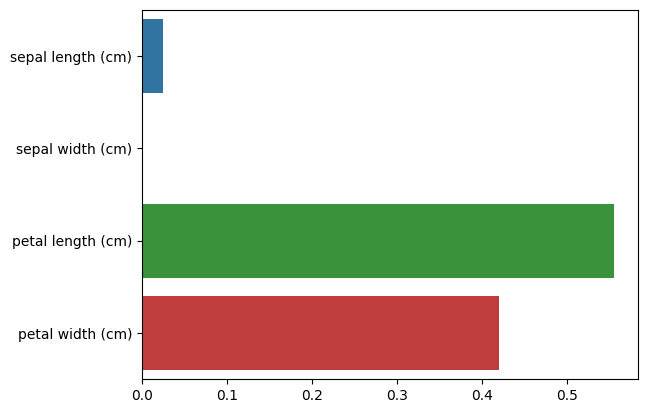

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f'Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature importance mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

* feature_importances_는 피처가 트리 분할시 정보 이득이나 지니계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것입니다. 일반적으로 값이 높을 수록 해당 피처의 중요도가 높다는 의미입니다. 
여러 feature들 중에서 petal_length가 가장 중요도가 높음을 알 수 있습니다.

## Decision Tree Overfitting

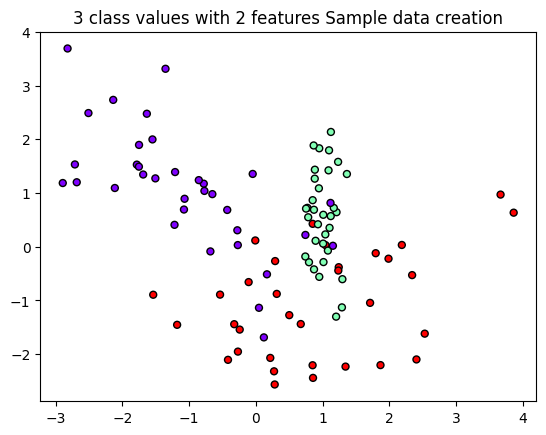

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features Sample data creation')

# 2차원 시각화를 위해 feature는 2개, 결정값 class는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, \
                                           n_classes=3, n_clusters_per_class=1, \
                                            random_state=0)

# plot 형태로 2개의 fatue로 2차원 좌표 시각호, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [9]:
import numpy as np

# Classifier의 Decision boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax=plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',\
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')

    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training data로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), \
                          np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class bouondary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,\
                           levels=np.arange(n_classes + 1) - 0.5,\
                            cmap='rainbow', clim=(y.min(), y.max()),
                            zorder=1)

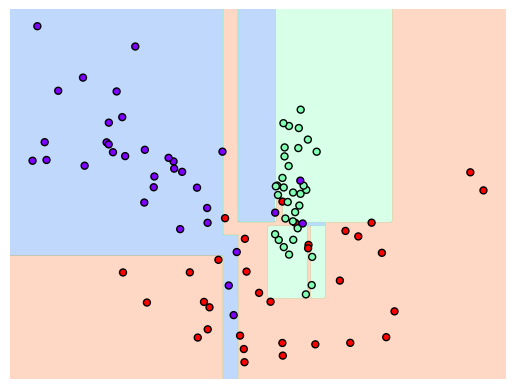

In [10]:
from sklearn.tree import DecisionTreeClassifier
# 특정한 트리 생성, 제약 없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)